## Problem

Implement the logistic regression algorithm to classify a sample with k features between 2 classes.

- **Input**: X (shape N\*k), y (shape N\*1)
- **Output**: Classifier

In [1]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## Data setup
N = 30
k = 2       # keeping k = 2 for demonstration
X_0 = np.random.normal(loc=2, scale=2, size=(N//2, k))
X_1 = np.random.normal(loc=5, scale=1.5, size=(N//2, k))
y_0 = np.zeros((N//2, 1))
y_1 = np.ones((N//2, 1))

X = np.vstack([X_0, X_1])
y = np.vstack([y_0, y_1])
print(X.shape)

(30, 2)


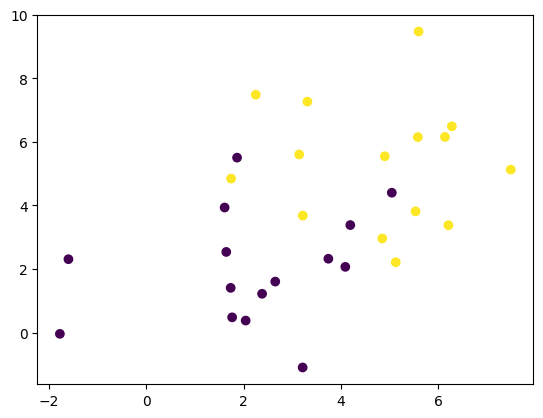

In [5]:
# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Solution/Implementation

In [ ]:
class LogisticRegression:
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x)) 
    
    def _bce(self, y_true, y_pred):
        eps = 1e-12
        return -np.mean(y_true * np.log(y_pred + eps) + (1-y_true) * np.log(1 - y_pred + eps))

    def __init__(self):
        self.W = None

    def fit(self, X, y, max_iters=100, lr=0.01):
        N, k = X.shape
        X_aug = np.hstack([np.ones((N, 1)), X])
        W = np.zeros((k+1, 1))
        losses = []
        for _ in range(max_iters):
            # calculate loss
            y_pred = self._sigmoid(X_aug @ W)
            loss = self._bce(y, y_pred)
            losses.append(loss)

            # calculate gradient
            grad = X_aug.T @ (y_pred - y)

            # update weights
            W -= lr * grad
        self.W = W
        return losses

    def predict(self, X):
        N = X.shape[0]
        X_aug = np.hstack([np.ones((N, 1)), X])
        return self._sigmoid(X_aug @ self.W)
            

In [29]:
# Test
classifier = LogisticRegression()
losses = classifier.fit(X, y)

y_pred = classifier.predict(X)
cls_pred = np.round(y_pred)

acc = np.mean(cls_pred == y)
print(f"Train set accuracy = {acc:.4f}")

Train set accuracy = 0.9000


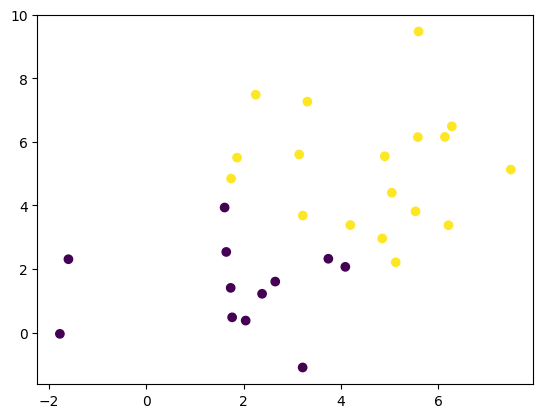

In [30]:
# plot
plt.scatter(X[:, 0], X[:, 1], c=cls_pred)
plt.show()

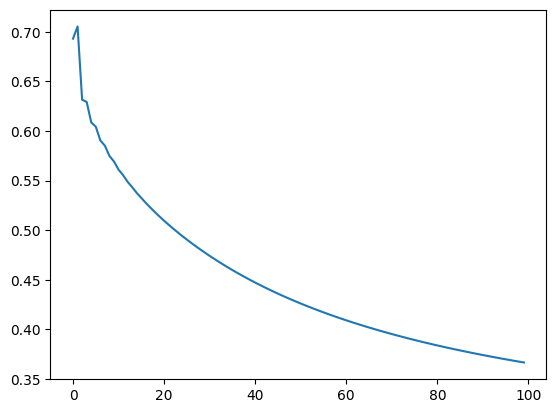

In [32]:
plt.plot(list(range(len(losses))), losses)
plt.show()